In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
customers = pd.read_csv('/content/drive/MyDrive/eCommerce Transactions Dataset/Customers.csv')
products =  pd.read_csv('/content/drive/MyDrive/eCommerce Transactions Dataset/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/eCommerce Transactions Dataset/Transactions.csv')

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
df = pd.merge(transactions, customers, on='CustomerID', how='inner')
df = pd.merge(df,products , on='ProductID', how='inner')
df = df.drop('Price_x',axis = 1)
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   CustomerName     1000 non-null   object        
 7   Region           1000 non-null   object        
 8   SignupDate       1000 non-null   datetime64[ns]
 9   ProductName      1000 non-null   object        
 10  Category         1000 non-null   object        
 11  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [ ]:
freq_orders = df.groupby(by=['CustomerID'], as_index=False)['TransactionID'].count().sort_values(by= 'TransactionID',ascending = False)
freq_orders.columns = ['CustomerID','TotalOrders']
freq_orders.head(5)

,CustomerID,TotalOrders
155,C0156,11
108,C0109,11
174,C0175,10
140,C0141,10
64,C0065,10


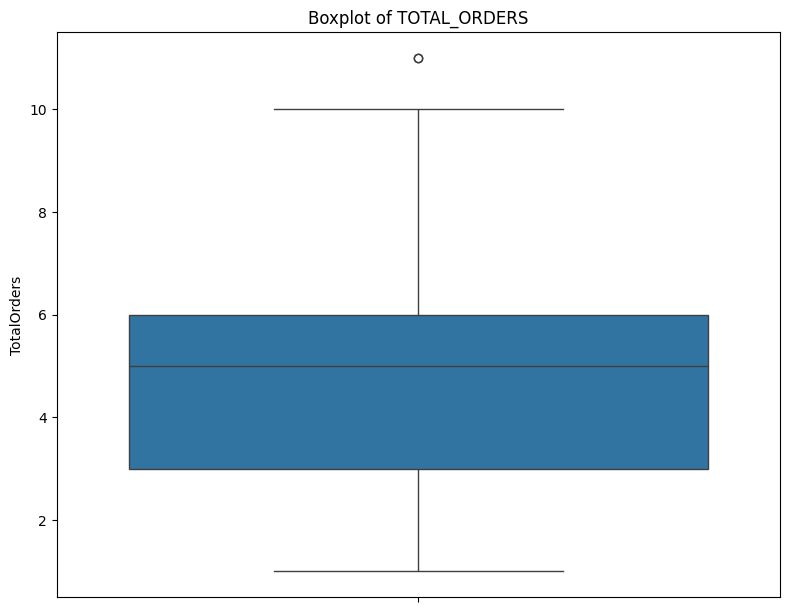

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(freq_orders['TotalOrders'])
plt.tight_layout()
plt.title("Boxplot of TOTAL_ORDERS")
plt.show()

In [ ]:
revenue_customer = df.groupby(by=['CustomerID'], as_index=False)['TotalValue'].sum().sort_values(by= 'TotalValue',ascending = False)
revenue_customer.columns = ['CustomerID','Revenue']
revenue_customer.head(5)

,CustomerID,Revenue
140,C0141,10673.87
53,C0054,8040.39
64,C0065,7663.70
155,C0156,7634.45
81,C0082,7572.91


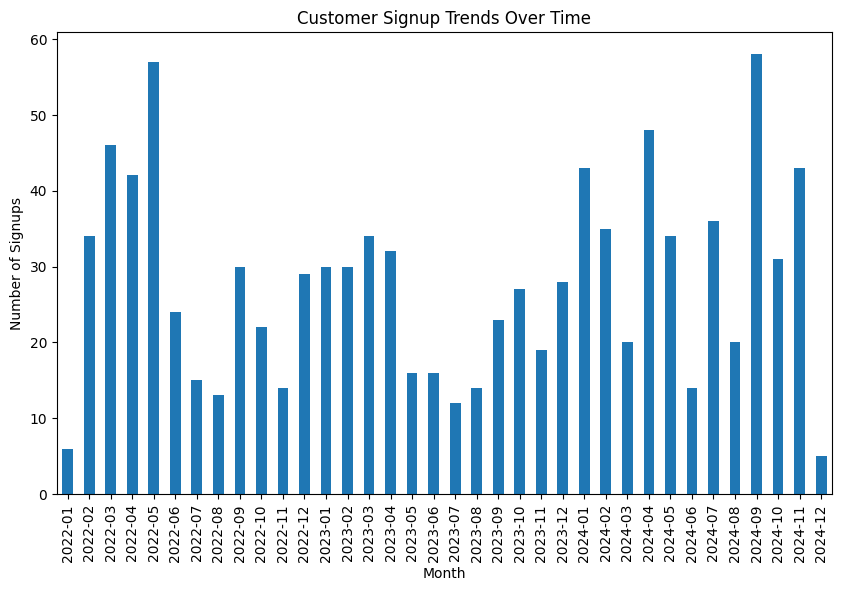

In [ ]:
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
signup_trends = df.groupby('SignupMonth')['CustomerID'].count()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

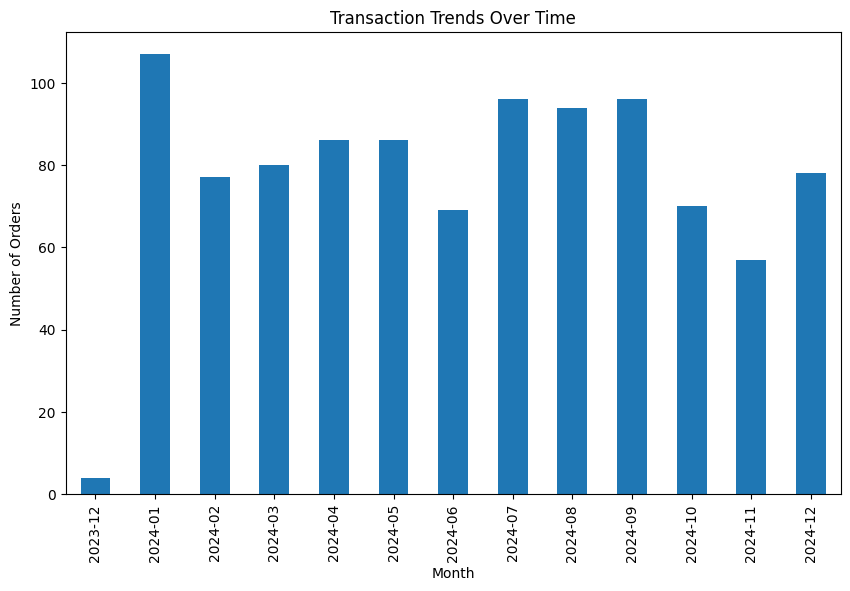

In [ ]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
signup_trends = df.groupby('TransactionMonth')['CustomerID'].count()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar')
plt.title('Transaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

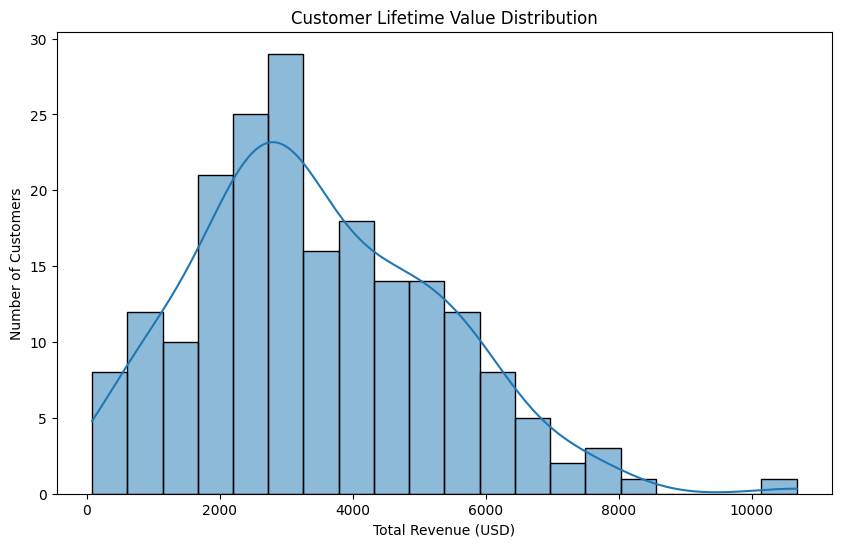

In [ ]:
cltv = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(cltv, bins=20, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
cltv.head()

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91


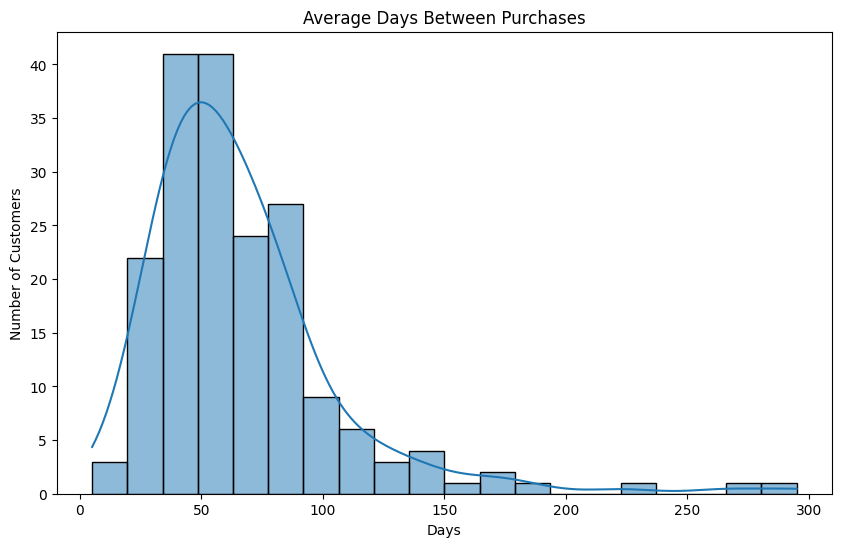

In [ ]:
df.sort_values(['CustomerID', 'TransactionDate'], inplace=True)
df['DaysBetweenPurchases'] = df.groupby('CustomerID')['TransactionDate'].diff().dt.days

avg_days_between = df.groupby('CustomerID')['DaysBetweenPurchases'].mean().dropna()

plt.figure(figsize=(10, 6))
sns.histplot(avg_days_between, bins=20, kde=True)
plt.title('Average Days Between Purchases')
plt.xlabel('Days')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
recency_df = df.groupby(by='CustomerName', as_index=False)['TransactionDate'].max()
recency_df.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = recency_df['LastPurchaseDate'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
frequency_df = df.groupby(by=['CustomerName'], as_index=False)['TransactionID'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
monetary_df = df.groupby(by='CustomerName', as_index=False)['TotalValue'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
rf_df = recency_df.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Cox,41,4,1717.55
1,Abigail Jones,51,11,5487.25
2,Aimee Taylor,28,7,7572.91
3,Albert Burke,56,6,5316.46
4,Alexander Barker,0,6,3347.60


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Cox,41,4,1717.55,61.868687,34.256927,34.170854
1,Abigail Jones,51,11,5487.25,56.565657,100.000000,99.748744
2,Aimee Taylor,28,7,7572.91,67.676768,80.352645,80.150754
3,Albert Burke,56,6,5316.46,51.262626,69.521411,69.346734
4,Alexander Barker,0,6,3347.60,100.000000,69.521411,69.346734


In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Cox,1.92
1,Abigail Jones,4.67
2,Aimee Taylor,3.92
3,Albert Burke,3.33
4,Alexander Barker,3.70
5,Alexander Lowe,2.85
6,Amanda Mcguire,2.73


In [ ]:
import numpy as np
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Aaron Cox,1.92,Low Value Customers
1,Abigail Jones,4.67,Top Customers
2,Aimee Taylor,3.92,Medium Value Customer
3,Albert Burke,3.33,Medium Value Customer
4,Alexander Barker,3.70,Medium Value Customer
5,Alexander Lowe,2.85,Low Value Customers
6,Amanda Mcguire,2.73,Low Value Customers
7,Amber Alexander,1.15,Lost Customers
8,Amber Gonzalez,0.85,Lost Customers
9,Andrea Hart,0.39,Lost Customers


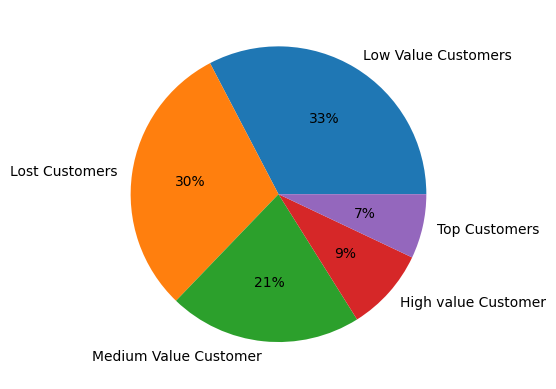

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

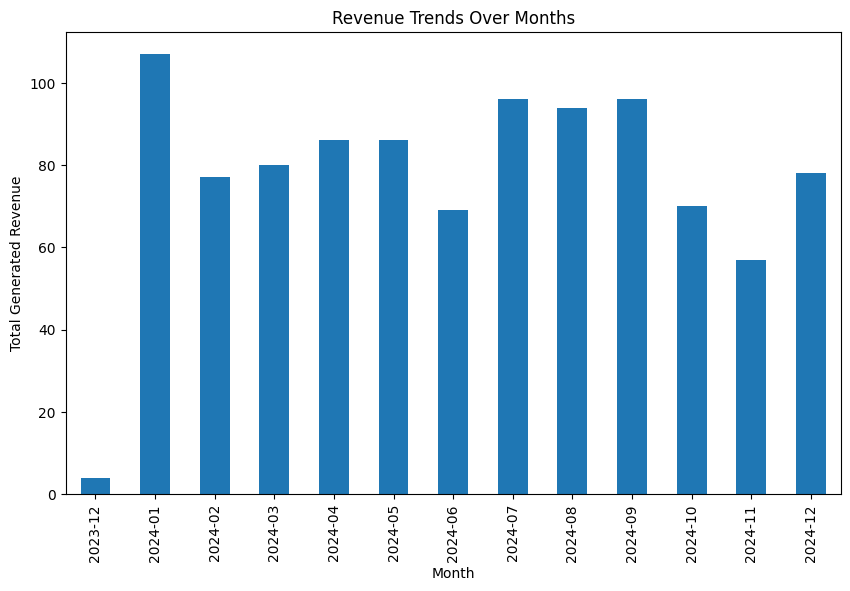

In [ ]:
revenue_by_month = df.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar')
plt.title('Revenue Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Total Generated Revenue')
plt.show()

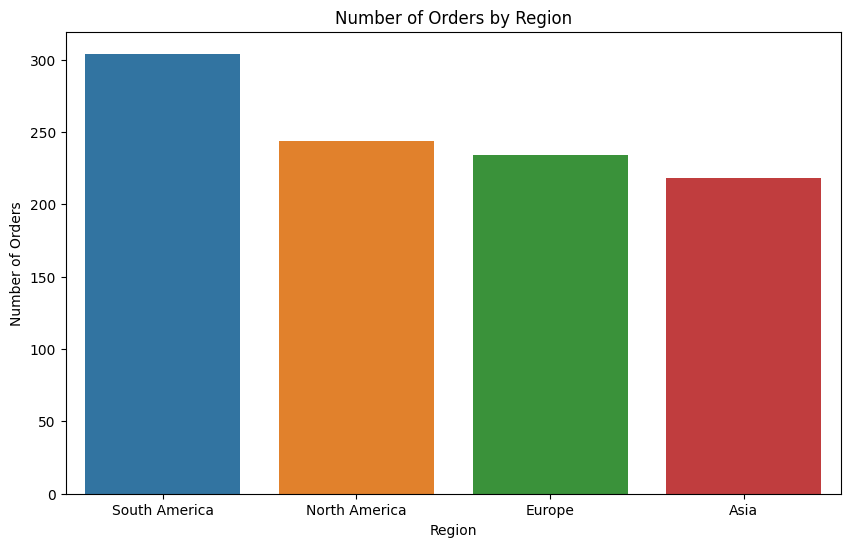

In [ ]:
regional_order_count = df.groupby('Region')['TransactionID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_order_count.index, y=regional_order_count.values,hue = regional_order_count.index)
plt.title('Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

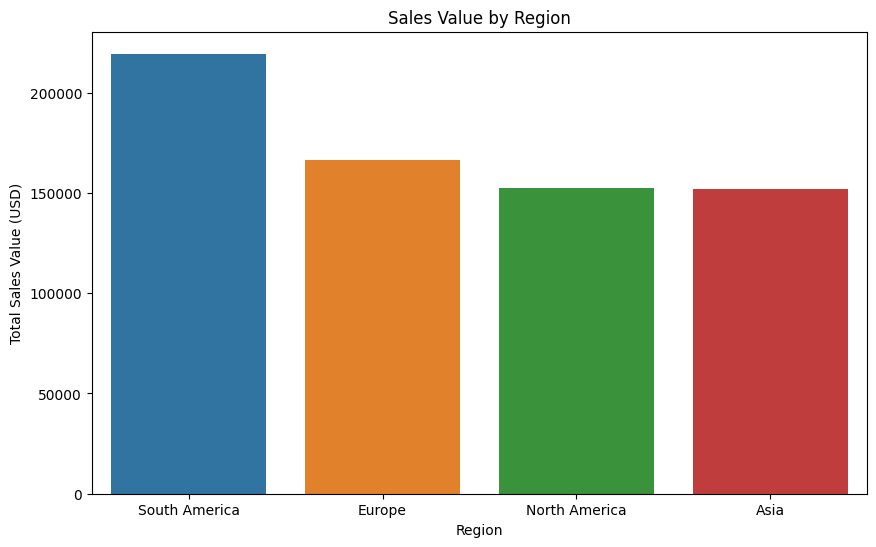

In [ ]:
regional_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values,hue = regional_sales.index)
plt.title('Sales Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value (USD)')
plt.show()

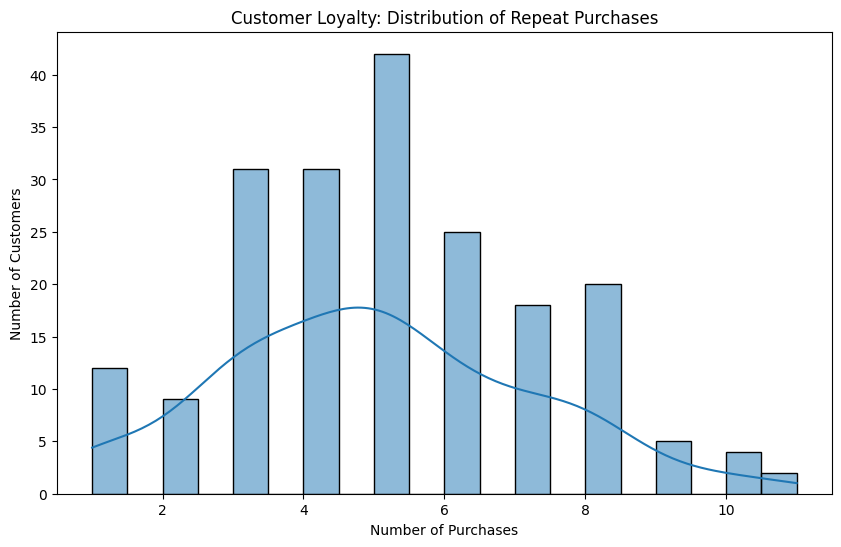

In [ ]:
repeat_purchases = df.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_purchases.columns = ['CustomerID', 'PurchaseCount']

plt.figure(figsize=(10, 6))
sns.histplot(repeat_purchases['PurchaseCount'], bins=20, kde=True)
plt.title('Customer Loyalty: Distribution of Repeat Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

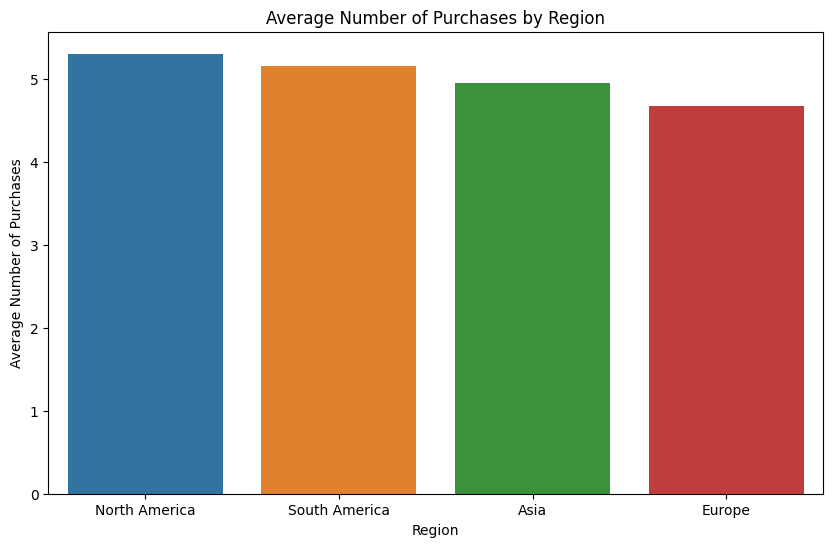

In [ ]:
customer_loyalty = pd.merge(repeat_purchases, customers, on='CustomerID', how='inner')
region_loyalty = customer_loyalty.groupby('Region')['PurchaseCount'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='PurchaseCount', data=region_loyalty, hue ='Region')
plt.title('Average Number of Purchases by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Purchases')
plt.show()

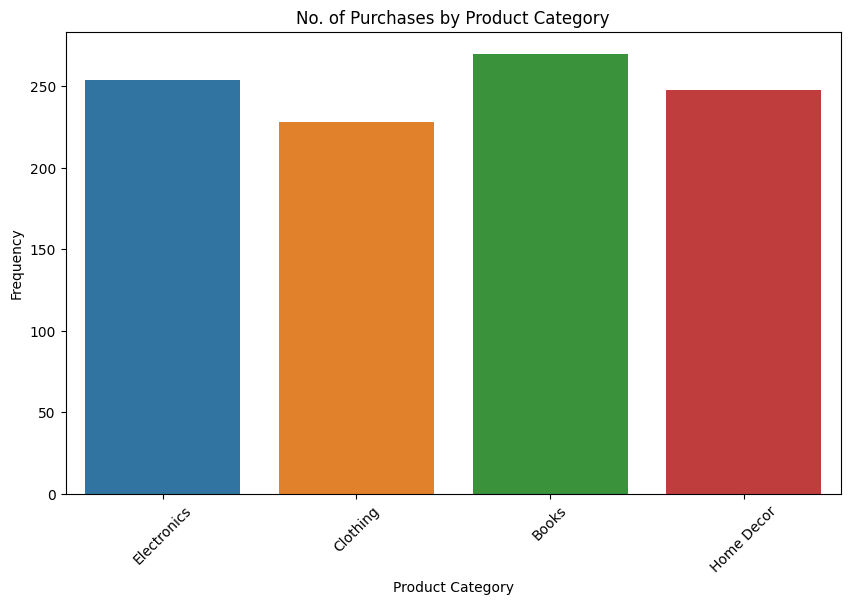

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Category',hue = 'Category')
plt.title('No. of Purchases by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.show()

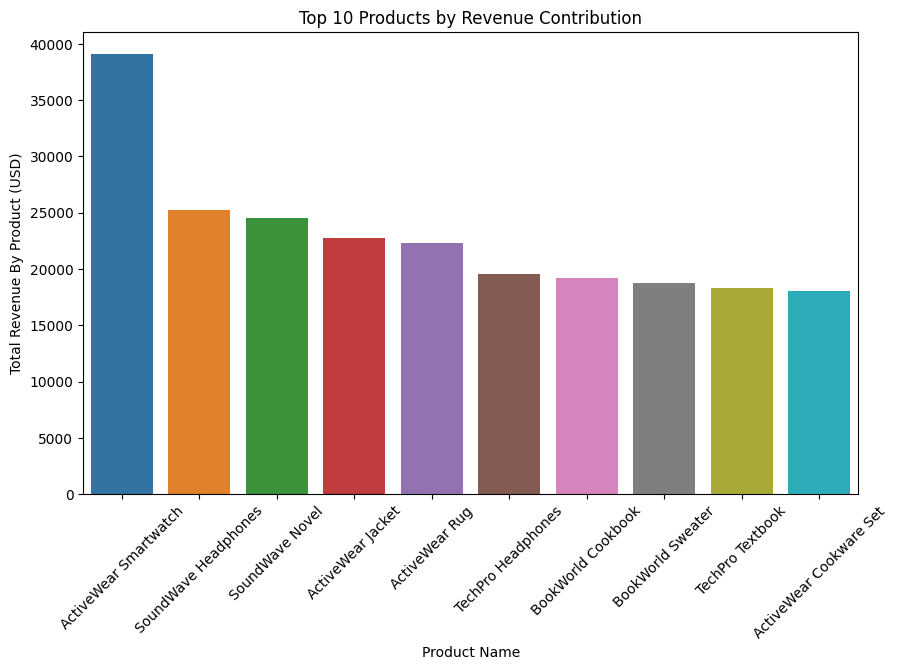

In [ ]:
# Calculate revenue contribution by product
product_revenue = df.groupby('ProductName')['TotalValue'].sum().reset_index()
product_revenue.columns = ['ProductName','Revenue_by_Product']
product_revenue = product_revenue.sort_values(by='Revenue_by_Product', ascending=False)

# Plot top 10 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='Revenue_by_Product', data=product_revenue.head(10),hue = 'ProductName')
plt.title('Top 10 Products by Revenue Contribution')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue By Product (USD)')
plt.xticks(rotation=45)
plt.show()

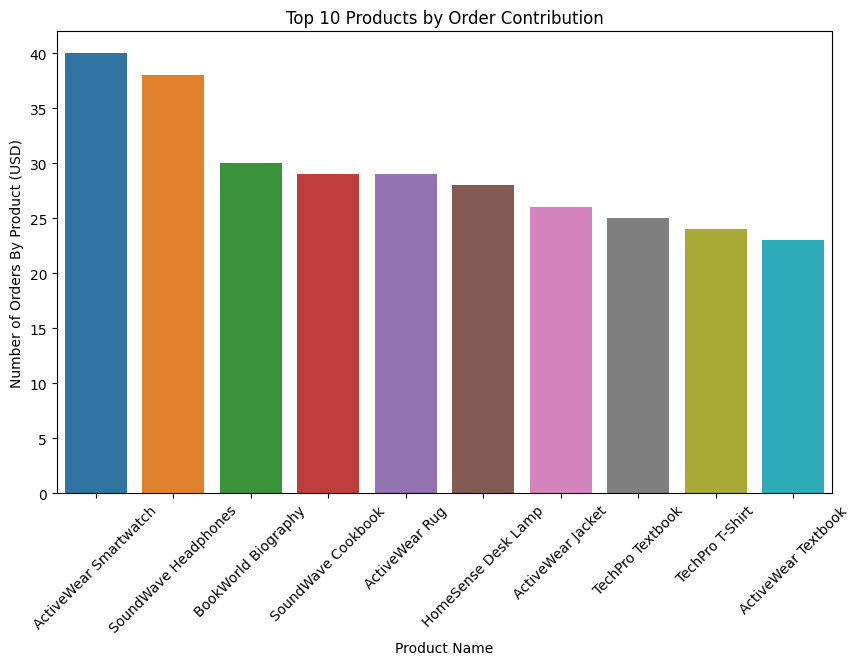

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
product_orders = df.groupby('ProductName')['TransactionID'].count().reset_index()
product_orders.columns = ['ProductName','No_Orders_by_Product']
product_orders = product_orders.sort_values(by='No_Orders_by_Product', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='No_Orders_by_Product', data=product_orders.head(10),hue = 'ProductName')
plt.title('Top 10 Products by Order Contribution')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders By Product (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['TotalValue'].sum()

689995.56